# Programming Assignment 5## Predrag Dindic
### Data Science 2023/2024

## **Task 1: Dimensionality Reduction**
Expected runtimes were recorded on a MacBook Pro (2014) with 2.8 GHz Intel Core i5 (2 cores, 8 threads) CPU.
In this task you will work with the “Labeled Faces in the Wild” data set. You can use *sklearn.datasets.fetch_lfw_people* to download the data set (this function might take a while to run for the first time as it will download the data set).

### Subtask 1: Data Loading and Data Preparation
Load the data set using the arguments *min_faces_per_person=30, resize=0.5*. Report the following:
* How many different people are in the data?
* How many images are in the data?
* What is the size of the images?
* Plot images of ten different people in the data set.
For the remaining tasks, split the data into 70% for training and 30% for validation. Use the stratified option of *sklearn.model_selection.train_test_split* (provide the class labels).

In [1]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np


# Downloading the LFW dataset
lfw_people = fetch_lfw_people(min_faces_per_person=30, resize=0.5)

# Getting the X and values
X = lfw_people.data
y = lfw_people.target

# Print some information about the dataset
print(f"Number of pictures: {X.shape[0]}.")
print(f"Picture sizes in pixels: {lfw_people.images.shape[1:]}.")
print(f"Number of different people in photos: {len(set(y))}.")

Number of pictures: 2370.
Picture sizes in pixels: (62, 47).
Number of different people in photos: 34.


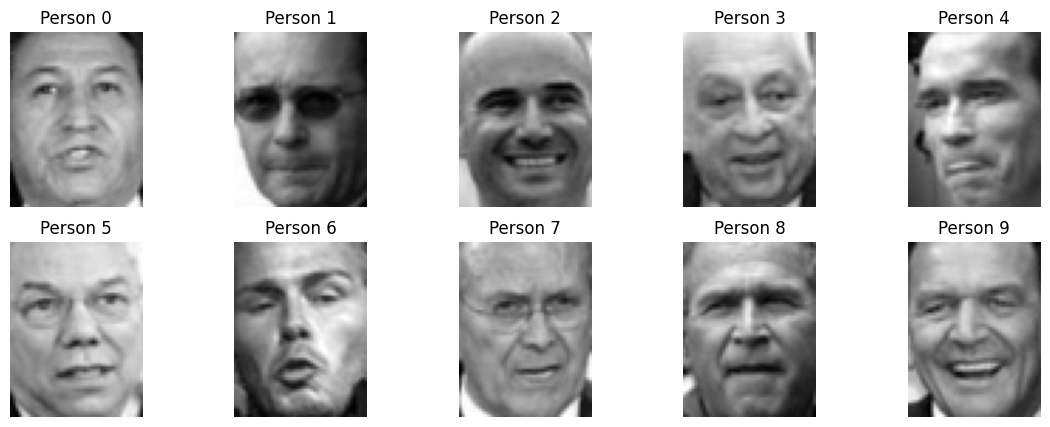

In [2]:
import numpy as np

# Visualizing 10 different people in the dataset

unique_people_indices = np.unique(y)
selected_people_indices = unique_people_indices[:10]

plt.figure(figsize=(14, 5))
for i, person_index in enumerate(selected_people_indices):
    person_images_indices = np.where(y == person_index)[0]
    sample_image_index = person_images_indices[0]
    sample_image = lfw_people.images[sample_image_index]
    
    plt.subplot(2, 5, i + 1)
    plt.imshow(sample_image, cmap='gray')
    plt.title(f"Person {person_index}")
    plt.axis('off')

plt.show()

In [3]:
# Splitting the data into 70% for training and 30% for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

### Subtask 2: Dimensionality Reduction Using PCA
Implement a class that implements the principal component analysis (PCA) for a given number of principal components. Do not use sklearn’s or another existing implementation but implement PCA yourself (of course you can use numpy functions for computing eigenvalues / the SVD, etc.). The class should enable to compute the PCA, to project given data onto the principal components, and to reconstruct images from the projection onto the principal components.
* Briefly describe your implementation in the report.

Use your PCA class to fit projections onto d ∈ {5, 10, 20, 40, 80, 160, 320, 640} principal components from your training data.
* Plot the first 5 principal components as images.
* Visualize 10 reconstructed images for each d.

Train a logistic regression classifier (you can use sklearn’s implementation) using the projected data for each d (use a *MinMaxScaler* to normalize the data; you might need to increase the number of iterations of the solver for LogisticRegression using the *max_iter* argument).
* Report the achieved classification accuracy of the classifiers on the training and validation set for all d.
* Comment on your observations.

In [4]:
class PCA:
    def __init__(self, n_components):
        """
        Defining a constructor with number of components as only argument. We also define variables for storing n number of components and
        a mean of each row.
        """
        self.n_components = n_components
        self.components = None
        self.mean = None
    
    def fit(self, X):
        """
        Function for fitting the X data where we want to get the n biggest eigenvectors. For that we first compute the covariance matrix and from
        the matrix we get the eigenvectors.
        """
        # We are first centering the data for further computations
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean

        # Then we are calculating the covariance matrix
        covariance_matrix = np.cov(X_centered, rowvar=False)

        # We use it for eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

        # Then we need to sort them for the n-most components
        sorted_indices = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorted_indices]
        eigenvectors = eigenvectors[:, sorted_indices]

        # At the end we save the components as the firs n elements of eigenvectors
        self.components = eigenvectors[:, :self.n_components]

    def project(self, X):
        """
        I also make a separate function for projecting the data onto n-number of principal components.
        """
        # Again we first need to center the data
        X_centered = X - self.mean

        # Projecting the data onto n principal components
        projection = np.dot(X_centered, self.components)
        
        return projection

    def reconstruct(self, X_proj):
        """
        At the end I need a function for reconstructing the X values from the projection to display the images.
        """
        # Reconstruct data from the projection onto principal components
        X_reconstructed = np.dot(X_proj, self.components.T) + self.mean

        return X_reconstructed

Now I need to plot the first 5 principal components as images.

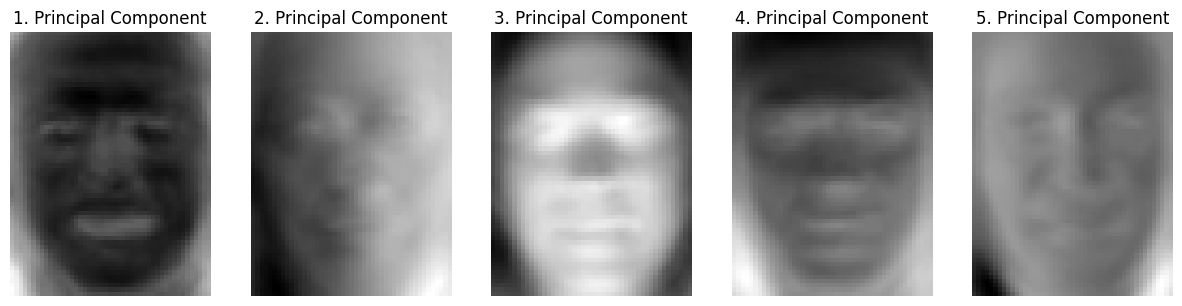

In [5]:
# Defining the image size for resizing the X values
image_size = (62, 47)

# Calling the functions from PCA class for plotting
pca_first5 = PCA(n_components=5)
pca_first5.fit(X_train)
first5_components = pca_first5.components.T.reshape(-1, *image_size)

# Plotting
plt.figure(figsize=(15, 6))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(first5_components[i], cmap='gray')
    plt.title(f"{i+1}. Principal Component")
    plt.axis('off')
plt.show()

Now I will visualize the reconstructed images for values of d (principal components) being: 5, 10, 20, 40, 80, 160, 320, 640.

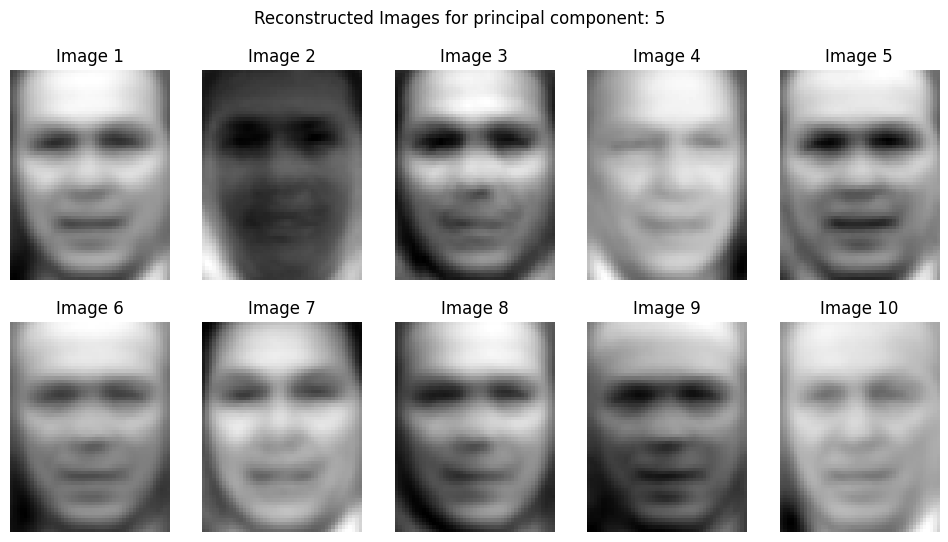

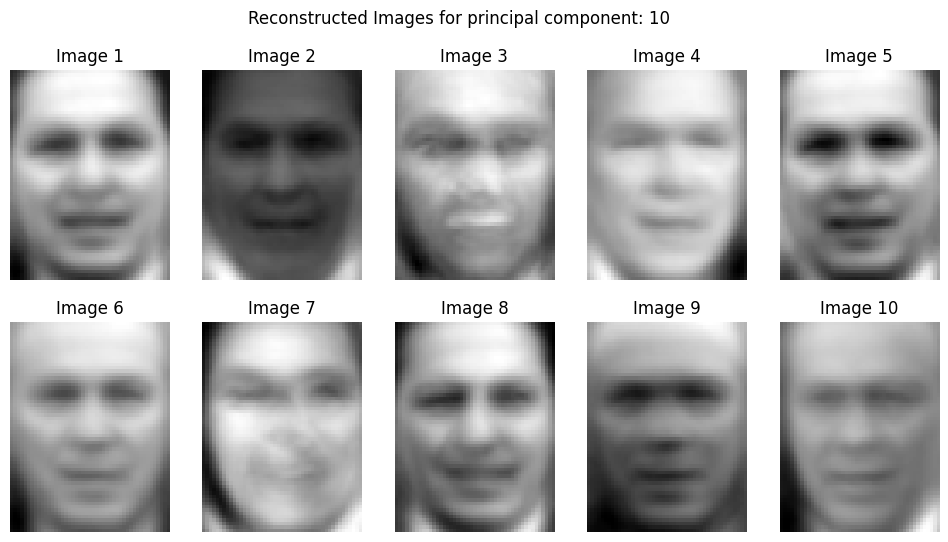

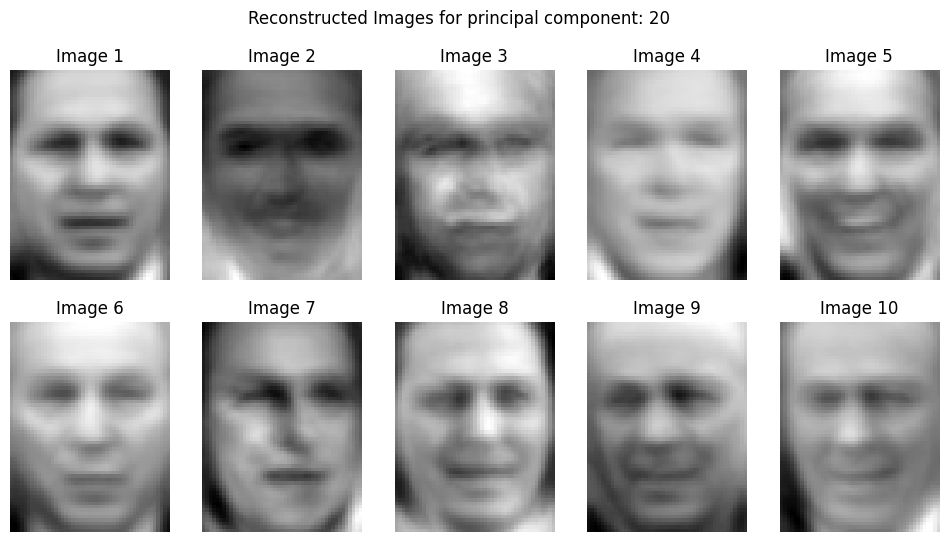

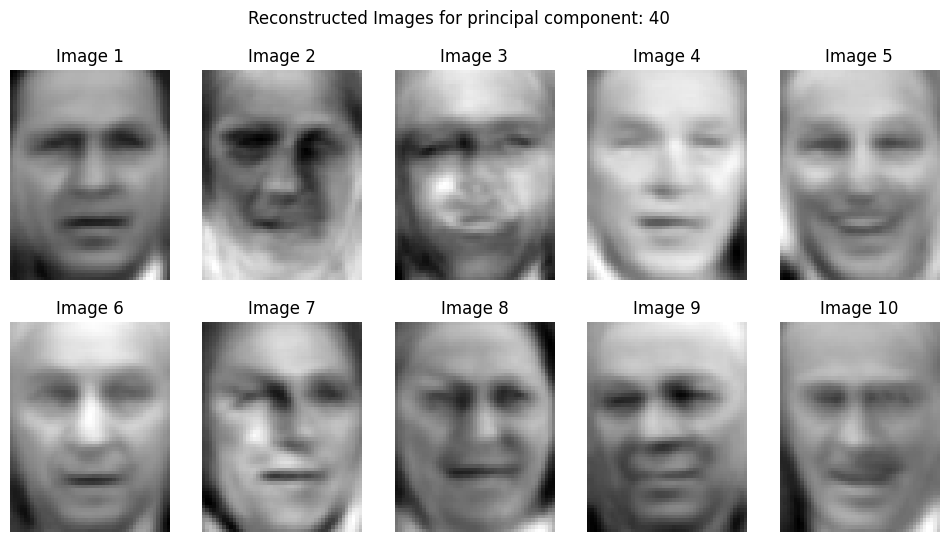

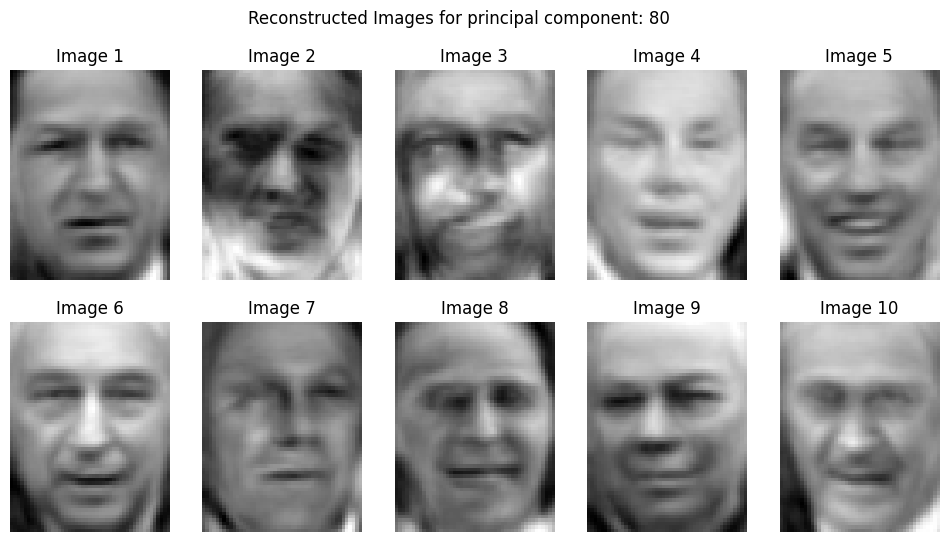

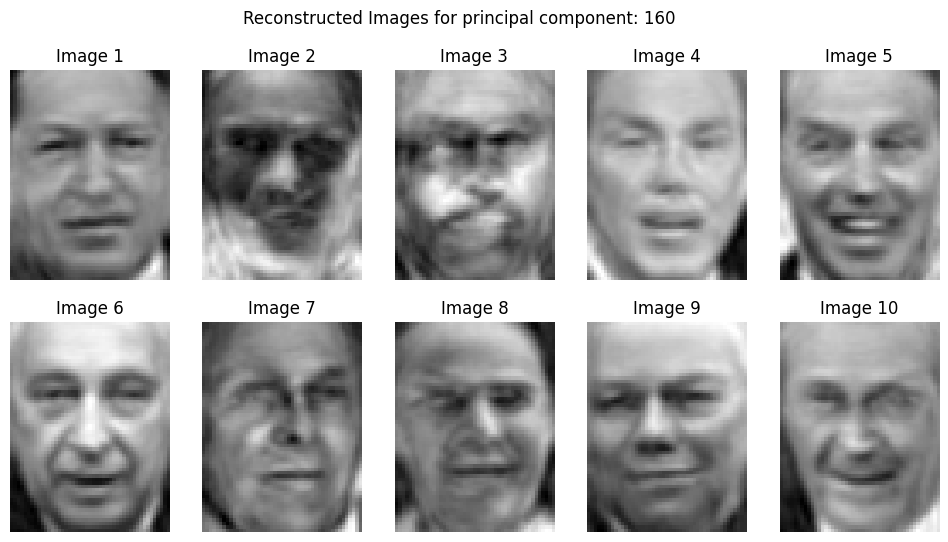

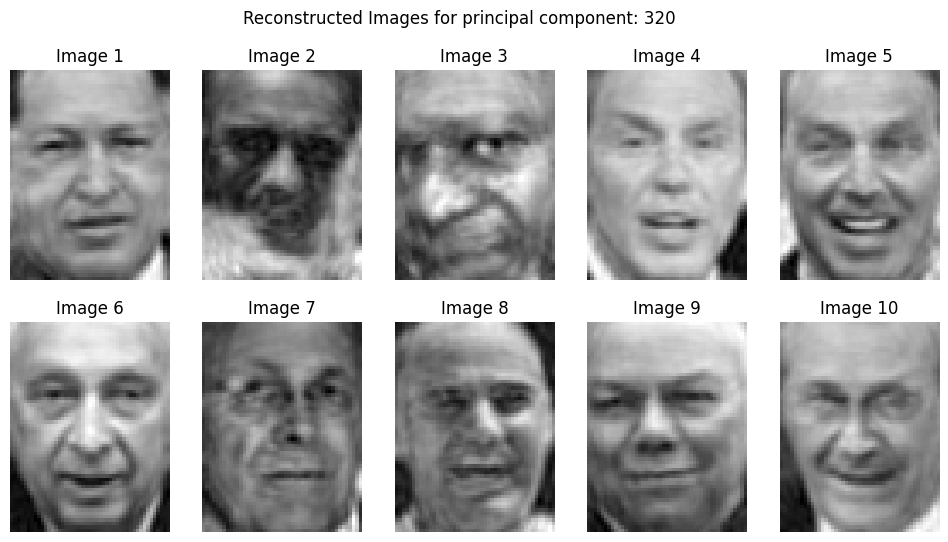

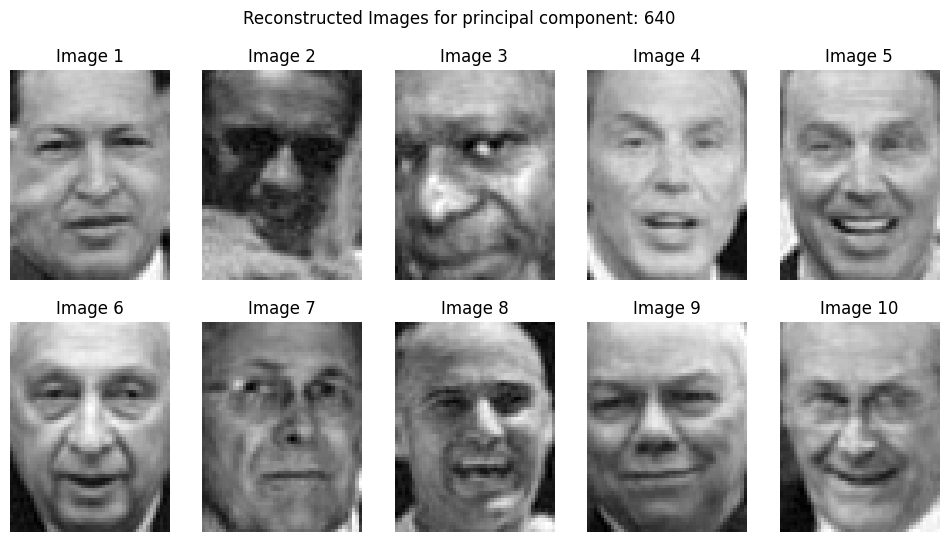

In [6]:
# Values of d (number of principal components)
d_values = [5, 10, 20, 40, 80, 160, 320, 640]

for d in d_values:
    pca_d = PCA(n_components=d)
    pca_d.fit(X_train)
    
    # Projecting the data onto principal components for the first 10 elements
    X_proj_d = pca_d.project(X_val[:10])

    # Reconstructing the data
    X_reconstructed_d = pca_d.reconstruct(X_proj_d)

    # Reshaping to original image size so I can plot them
    X_reconstructed_d = X_reconstructed_d.reshape(-1, *image_size)

    # Plotting
    plt.figure(figsize=(12, 6))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(X_reconstructed_d[i], cmap='gray')
        plt.title(f"Image {i+1}")
        plt.axis('off')
    plt.suptitle(f"Reconstructed Images for principal component: {d}")
    plt.show()

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

# Arrays for storing the accuracies for later plotting
train_acc = []
val_acc = []

# Scaler initialization
scaler = MinMaxScaler()

for d in d_values:
    # Projecting the data onto principal components
    pca_d = PCA(n_components=d)
    pca_d.fit(X_train)
    X_proj_train_d = pca_d.project(X_train)
    X_proj_val_d = pca_d.project(X_val)

    # Normalizing the data
    X_proj_train_d_scaled = scaler.fit_transform(X_proj_train_d)
    X_proj_val_d_scaled = scaler.transform(X_proj_val_d)

    # Training
    logistic_reg = LogisticRegression(max_iter=1000, random_state=42)
    logistic_reg.fit(X_proj_train_d_scaled, y_train)

    # Predicting
    y_train_pred = logistic_reg.predict(X_proj_train_d_scaled)
    y_val_pred = logistic_reg.predict(X_proj_val_d_scaled)

    # Calculating accuracy
    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_val = accuracy_score(y_val, y_val_pred)

    # Appending the results to the tables
    train_acc.append(accuracy_train)
    val_acc.append(accuracy_val)

Now I will plot the calculated data for better visual understanding.

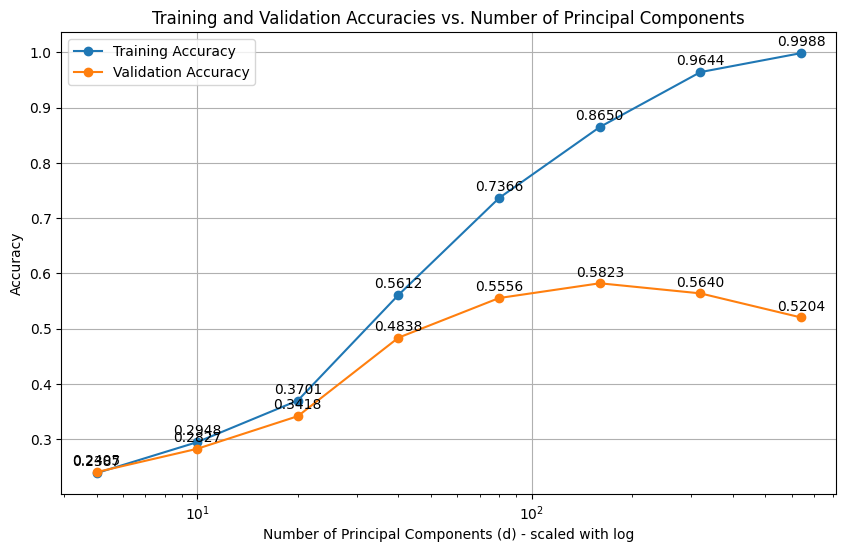

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(d_values, train_acc, marker='o', label='Training Accuracy')
plt.plot(d_values, val_acc, marker='o', label='Validation Accuracy')

# Adding the exact accuracy to each point/marker
for d, t_acc, v_acc in zip(d_values, train_acc, val_acc):
    plt.annotate(f'{t_acc:.4f}', (d, t_acc), textcoords="offset points", xytext=(0,5), ha='center')
    plt.annotate(f'{v_acc:.4f}', (d, v_acc), textcoords="offset points", xytext=(0,5), ha='center')

# Scaling the x axis logarithmically for better visualization
plt.xscale('log') 
plt.xlabel('Number of Principal Components (d) - scaled with log')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracies vs. Number of Principal Components')
plt.legend()
plt.grid()
plt.show()

As we can see from the pictures plotted, more principal components give us a better representation of the original images (we keep more information with the dimensionality reduction). \
From the last plot, we can see that as the number of principal components (d) increases, the validation accuracy tends to improve. However, there is a point where increasing d further does not significantly improve the validation accuracy, and it might even lead to overfitting.
The training accuracy generally follows a similar pattern to the training accuracy, improving as d increases. There might be a point where the validation accuracy stagnates or even starts to decrease. This means that adding more principal components might not necessarily improve generalization performance, so we need to find an optimal number of principal components. We want to find a balance of capturing relevant information of the data while avoiding overfitting. We would probably look for the number of principal components where training accuracy is maximized and valdidation accuracy is not decreasing drastically.

## Subtask 3: Dimensionality Reduction Using Autoencoders
Use sklearn to train autoencoders for dimensionality reduction. In particular use the *sklearn.neural_network.MLPRegressor* class with hidden sizes of (a, b, d, b, a) for a, b ∈ N, d ∈ {40, 80} and rectified linear units. You can then use the following code snippets to encode images (in vector form) and decode images from compressed representations (where mlp denotes the MLPRegressor instance):

    def encode(X, mlp):
    """
    This function is not working for general MLPs,
    the MLP must have the layer-configuration as
    stated in the exercise description.
    
    X must have the shape
    n_images x (witdh in pixels * height in pixels)
    """
    z = X
    for i in range(len(mlp.coefs_) // 2):
    z = z @ mlp.coefs_[i] + mlp.intercepts_[i]
    z = np.maximum(z, 0)
    
    return z
    
    def decode(Z, mlp):
    """
    This function is not working for general MLPs, the MLP
    must have the layer-configuration as stated in the
    exercise description.
    
    Z must have the shape n_images x d
    """
    z = Z
    for i in range(len(mlp.coefs_) // 2, len(mlp.coefs_)):
    z = z @ mlp.coefs_[i] + mlp.intercepts_[i]
    if i < len(mlp.coefs_) - 1:
    z = np.maximum(z, 0)
    
    return z


Use your Autoencoder to project the images from the training data onto d ∈ {40, 80} dimensions. Try reasonable choices for the hidden layer sizes (see also the hint below).
* Visualize 10 reconstructed images for each d.
  
Train a logistic regression classifier (you can use sklearn’s implementation) using the projected data for each d (use a MinMaxScaler to normalize the data; you might need to increase the number of iterations of the solver for LogisticRegression using the max_iter argument).
* Report the achieved classification accuracy of the classifiers on the training and validation set for all d.
* Comment on your observations.
* Compare your results to those of the previous task.


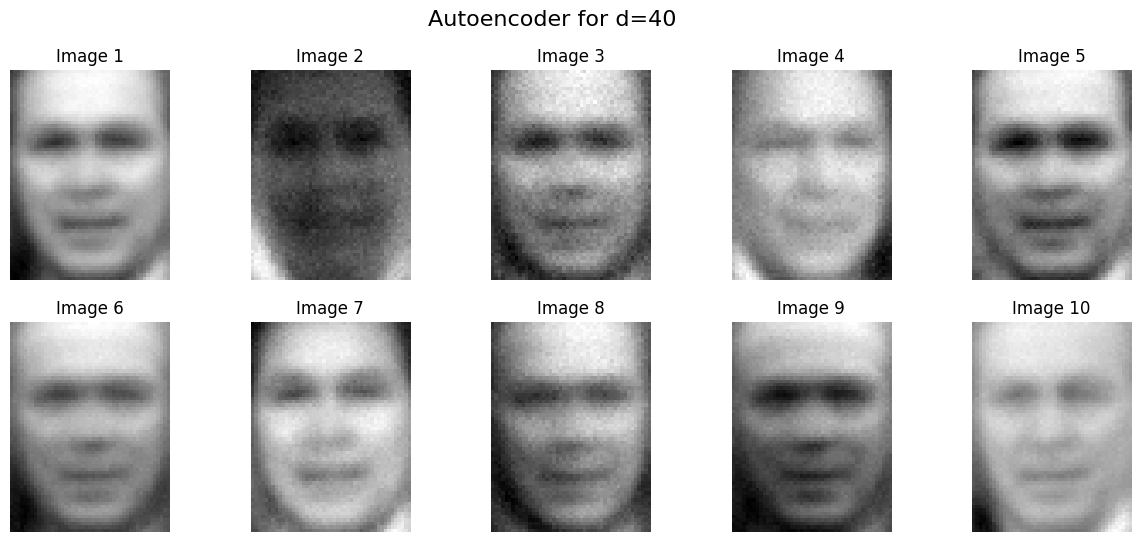

Elapsed time for d=40 with a=300 and b=200: 11.631784677505493.


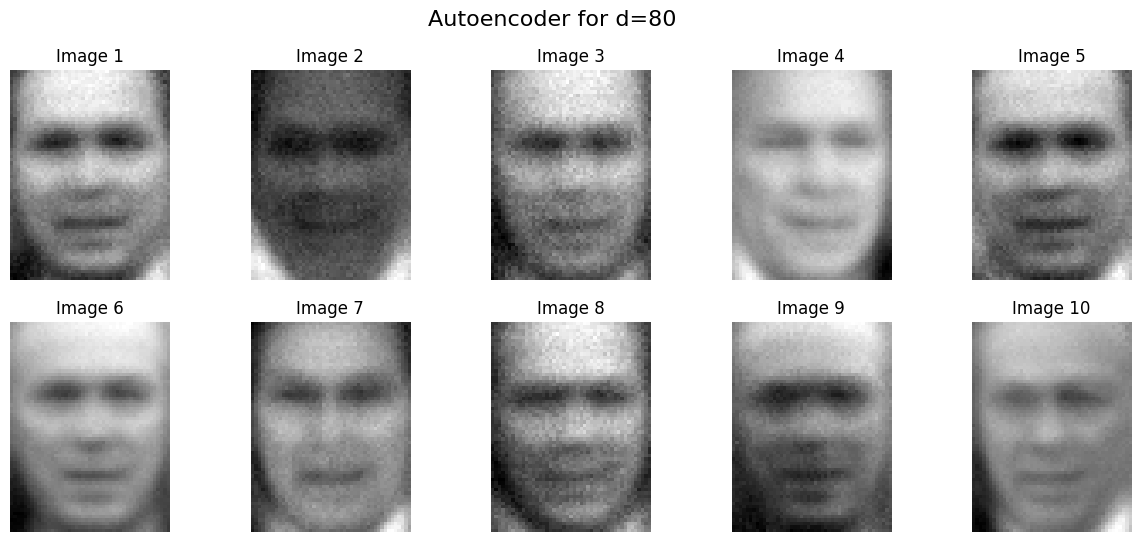

Elapsed time for d=80 with a=300 and b=200: 16.9634211063385.


In [9]:
from sklearn.neural_network import MLPRegressor
import time

# Using the given encode and decode functions to project images onto d's
def encode(X, mlp):
    """
    This function is not working for general MLPs,
    the MLP must have the layer-configuration as
    stated in the exercise description.
    
    X must have the shape
    n_images x (witdh in pixels * height in pixels)
    """
    z = X
    for i in range(len(mlp.coefs_) // 2):
        z = z @ mlp.coefs_[i] + mlp.intercepts_[i]
        z = np.maximum(z, 0)
    return z

def decode(Z, mlp):
    """
    This function is not working for general MLPs, the MLP
    must have the layer-configuration as stated in the
    exercise description.
    
    Z must have the shape n_images x d
    """
    z = Z
    for i in range(len(mlp.coefs_) // 2, len(mlp.coefs_)):
        z = z @ mlp.coefs_[i] + mlp.intercepts_[i]
        if i < len(mlp.coefs_) - 1:
            z = np.maximum(z, 0)
    return z

def visualize_reconstructed_images(X, a, b, d, num_images=10, title="Auto", plot = True):
    """
    A function where we encode and decode our data and visualize the decoded images. 
    It takes data, a, b and d  as arguments where you define the architecture of your autoencoder,
    number of images to display and a title of the plot as arguments.
    For encoding, the given encode and decode functions from the PA sheet areused.
    """

    start = time.time()
    
    # Defining the first hidden layer sizes for the autoencoder with d=40
    hidden_layer_sizes = (a, b, d, a, b)
    
    # Training
    mlp_autoencoder = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, activation='relu', max_iter=500, random_state=42)
    mlp_autoencoder.fit(X_train, X_train)
    
    # Encoding
    X_enc = encode(X, mlp_autoencoder)

    # Decoding
    X_reconstructed = decode(X_enc, mlp_autoencoder)

    # Reshaping images to original size so I can display them
    X_reconstructed = X_reconstructed.reshape(-1, lfw_people.images.shape[1], lfw_people.images.shape[2])

    # Visualizing
    if(plot):
        plt.figure(figsize=(15, 6))
        plt.suptitle(title, fontsize=16)
        for i in range(num_images):
            plt.subplot(2, num_images // 2, i + 1)
            plt.imshow(X_reconstructed[i], cmap='gray')
            plt.title(f"Image {i + 1}")
            plt.axis('off')
        plt.show()
    end = time.time()
    print(f"Elapsed time for d={d} with a={a} and b={b}: {end - start}.")
    return X_reconstructed

#For the architecture of the neural networks I choose a=300, b=200 and the middle layer will be either 40 or 80

# Visualizing for d=40
reconstructed_40 = visualize_reconstructed_images(X_val, 300, 200, 40, num_images=10, title='Autoencoder for d=40', plot = True)

# Visualizing for d=80
reconstructed_80 = visualize_reconstructed_images(X_val, 300, 200, 80, num_images=10, title='Autoencoder for d=80', plot = True)

In [10]:
d_values = [5, 10, 20, 40, 80, 160, 320, 640]

# Initializing the scaler
scaler = MinMaxScaler()

# Arrays for storing the results
train_accuracies = []
validation_accuracies = []

for d in d_values:
    hidden_layer_sizes = (300, 200, d, 300, 200)
    
    # Training
    mlp_autoencoder = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, activation='relu', max_iter=500, random_state=42)
    mlp_autoencoder.fit(X_train, X_train)

    # Encoding
    X_proj_train = encode(X_train, mlp_autoencoder)
    X_proj_val = encode(X_val, mlp_autoencoder)

    # Normalizing
    X_proj_train_scaled = scaler.fit_transform(X_proj_train)
    X_proj_val_scaled = scaler.transform(X_proj_val)

    # Training logistic regression classifier
    logistic_reg = LogisticRegression(max_iter=1000, random_state=42)
    logistic_reg.fit(X_proj_train_scaled, y_train)

    # Predicting
    y_train_pred = logistic_reg.predict(X_proj_train_scaled)
    y_val_pred = logistic_reg.predict(X_proj_val_scaled)

    # Calculating accuracy
    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_val = accuracy_score(y_val, y_val_pred)

    # Appending the results to the array
    train_accuracies.append(accuracy_train)
    validation_accuracies.append(accuracy_val)

Now when I have stored accuracies, I can plot them.

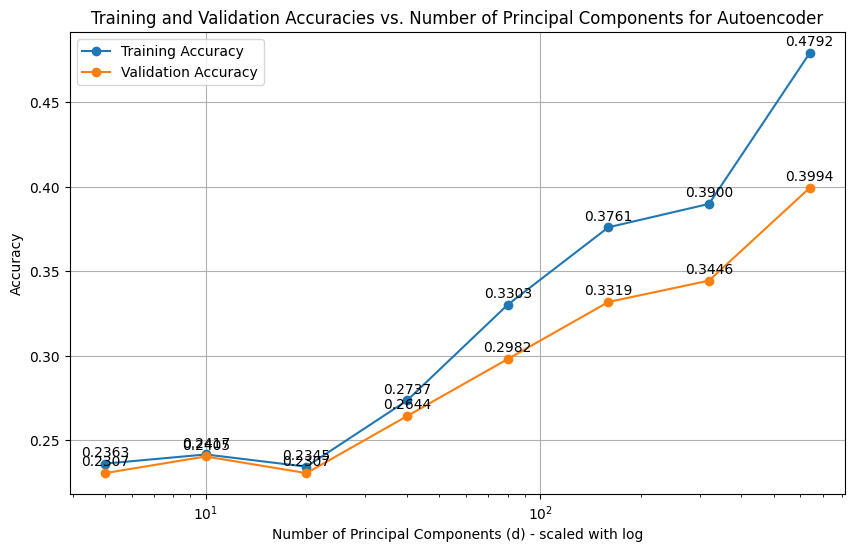

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(d_values, train_accuracies, marker='o', label='Training Accuracy')
plt.plot(d_values, validation_accuracies, marker='o', label='Validation Accuracy')

# Adding the accuracy to each point
for d, train_acc, val_acc in zip(d_values, train_accuracies, validation_accuracies):
    plt.annotate(f'{train_acc:.4f}', (d, train_acc), textcoords="offset points", xytext=(0,5), ha='center')
    plt.annotate(f'{val_acc:.4f}', (d, val_acc), textcoords="offset points", xytext=(0,5), ha='center')



# Scaling the x axis logarithmically for better visualization
plt.xscale('log') 
plt.xlabel('Number of Principal Components (d) - scaled with log')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracies vs. Number of Principal Components for Autoencoder')
plt.legend()
plt.grid()
plt.show()

In this example with using an autoencoder, we can see that the accuracy of both validation and training data converges with increasing the number of principal components which would lead me to assume that higher numbers of principal components achieve better generalization. That fact would probably be untrue because the accuracy for both datasets actually decreases from the second to the third 'd'. We can also observe that the accuracies converge slower that the PCA example, but are less likely to overfit. 

Also, we can see that the optimal number of principal components isn't the same for PCA and autoencoder, and Autoencoder is computationally more expensive, which is also dependant on it's architecture. Since it is non-linear, it can capture more complex relationships in the data in comparison to PCA.


# **Task 2: Clustering**
In this task you will implement Lloyd’s algorithm for clustering and k-means++ for initialization and test your implementation on four datasets with different characteristics.
## Subtask 1: Generate data
Generate four datasets for clustering using the following code:

    import numpy as np
    from sklearn.datasets import make_blobs
    
    n_samples = 1500
    random_state = 170
    transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
    
    X, y = make_blobs(n_samples=n_samples, random_state=random_state)
    X_aniso = np.dot(X, transformation) # Anisotropic blobs
    X_varied, y_varied = make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=
    random_state
    ) # Unequal variance
    X_filtered = np.vstack(
    (X[y == 0][:500], X[y == 1][:100], X[y == 2][:10])
    ) # Unevenly sized blobs
    y_filtered = [0] * 500 + [1] * 100 + [2] * 10

The datasets are given by X, y, X_aniso, y, X_varied, y_varied, and X_filtered, y_filtered, respectively. You can use the following code snippet to visualize the data and cluster identities.

    import matplotlib.pyplot as plt
    
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
    
    axs[0, 0].scatter(X[:, 0], X[:, 1], c=y)
    axs[0, 0].set_title("Mixture of Gaussian Blobs")
    
    axs[0, 1].scatter(X_aniso[:, 0], X_aniso[:, 1], c=y)
    axs[0, 1].set_title("Anisotropically Distributed Blobs")
    
    axs[1, 0].scatter(X_varied[:, 0], X_varied[:, 1], c=y_varied)
    axs[1, 0].set_title("Unequal Variance")
    
    axs[1, 1].scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_filtered)
    axs[1, 1].set_title("Unevenly Sized Blobs")
    
    plt.suptitle("Ground truth clusters").set_y(0.95)
    plt.show()

Present the plot showing the data and cluster identities.


In [12]:
import numpy as np
from sklearn.datasets import make_blobs

n_samples = 1500
random_state = 170
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]

X, y = make_blobs(n_samples=n_samples, random_state=random_state)
X_aniso = np.dot(X, transformation) # Anisotropic blobs
X_varied, y_varied = make_blobs(
n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=
random_state
) # Unequal variance
X_filtered = np.vstack(
(X[y == 0][:500], X[y == 1][:100], X[y == 2][:10])
) # Unevenly sized blobs
y_filtered = [0] * 500 + [1] * 100 + [2] * 10

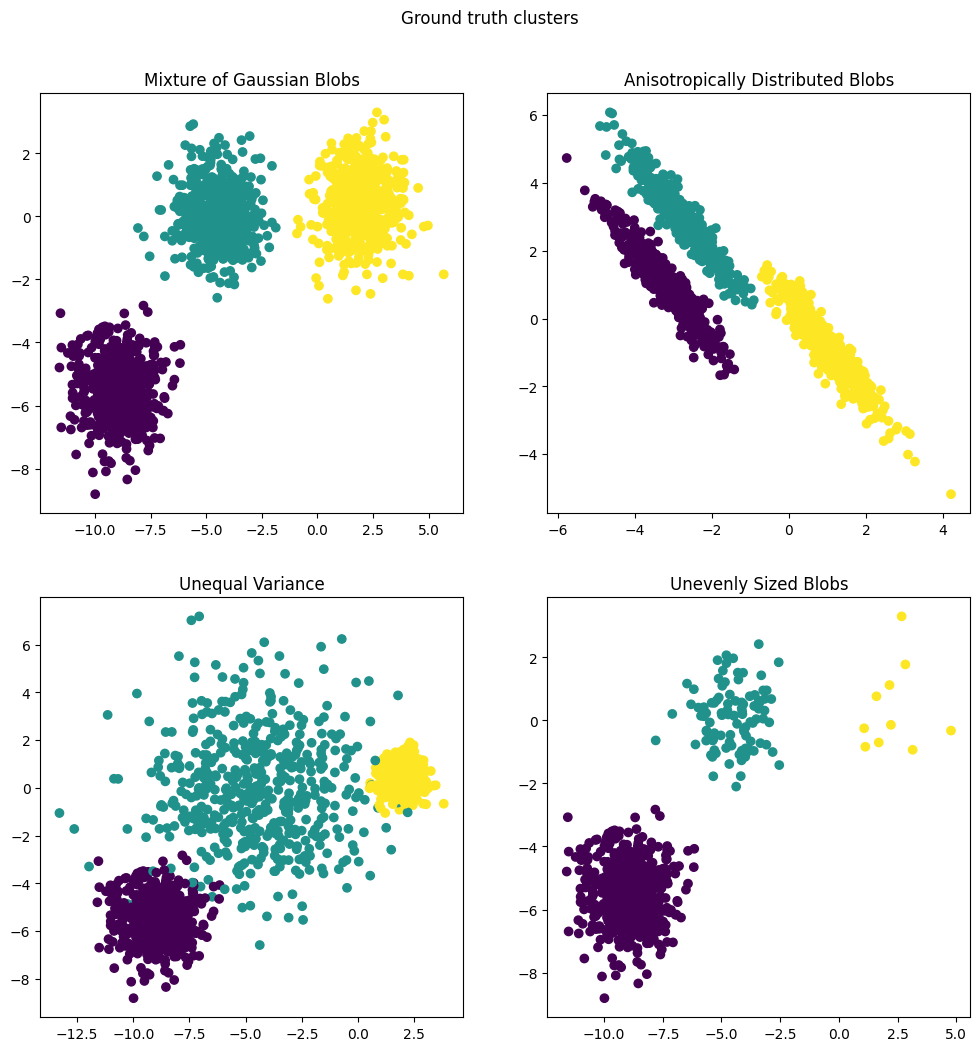

In [13]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

axs[0, 0].scatter(X[:, 0], X[:, 1], c=y)
axs[0, 0].set_title("Mixture of Gaussian Blobs")

axs[0, 1].scatter(X_aniso[:, 0], X_aniso[:, 1], c=y)
axs[0, 1].set_title("Anisotropically Distributed Blobs")

axs[1, 0].scatter(X_varied[:, 0], X_varied[:, 1], c=y_varied)
axs[1, 0].set_title("Unequal Variance")

axs[1, 1].scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_filtered)
axs[1, 1].set_title("Unevenly Sized Blobs")

plt.suptitle("Ground truth clusters").set_y(0.95)
plt.show()

## Subtask 2: Lloyd’s algorithm
Implement Lloyd’s algorithm for clustering (don’t use an existing implementation). Initialize cluster centers by randomly selecting k points from the data as initial cluster centers. If no data points are assigned to a cluster center in an assignment step, reset the cluster center to a randomly selected point from the data.
* Use your algorithm to perform clustering for k ∈ {1, 2, 3, 4, 5, 6} cluster centers. Report plots of your clustering results. What can you observe regarding the clustering results?
* Report plots showing the k-means objective for the four datasets and k ∈ {1, 2, 3, 4, 5, 6} cluster centers. What do you observe?


In [14]:
def lloyds_algorithm(data, k, max_iterations=100):
    """
    This is a function where we perform k-means algorithm. It takes 3 arguments: the data we cluster, number of clusters and the number of
    maximum iterations since it could converge infinitely.
    We first choose random k centroids from the data. After that, we iterate over max number of iterations, where we calculate the distances
    from the points to the defined centroids and assign them as such. After we assign them, we re-calculate the centroids as the mean of all 
    those points that belong to that cluster. In the end, we check if some cluster has no points assigned to him (outlier) and if that is true,
    we re-pick the centroid as some random point from the dataset. The algorithm can also stop before getting to the max iterations if the
    assignment table doesn't change (we found the optimal clustering).
    """
    # Initializing the first centroids randomly from the data
    cluster_centers = data[np.random.choice(data.shape[0], k, replace=False)]

    for iteration in range(max_iterations):
        # Calculating the distances  from the point to every centroid and storing it into an array
        distances = np.linalg.norm(data[:, np.newaxis] - cluster_centers, axis=2)

        # Picking the minimum distance to assign that point to that cluster
        assignments = np.argmin(distances, axis=1)
        
        # We update the centroids/move them in the mean of the points in the cluster
        new_centers = np.array([data[assignments == i].mean(axis=0) for i in range(k)])

        # If a cluster has no assigned points, reset its center to a randomly selected point
        empty_clusters = np.where(np.isnan(new_centers).any(axis=1))[0]
        if len(empty_clusters) > 0:
            for empty_cluster in empty_clusters:
                new_centers[empty_cluster] = data[np.random.choice(data.shape[0])]

        # Checking if we should end the algorithm - if we found the optimal clusters
        if np.array_equal(cluster_centers, new_centers):
            break

        cluster_centers = new_centers

    return cluster_centers, assignments

We also need a function for plotting the clustering which I define under.

In [15]:
def plot_clusters(ax, data, assignments, centers, k):
    ax.scatter(data[:, 0], data[:, 1], c=assignments, cmap='viridis', alpha=0.7)
    ax.scatter(centers[:, 0], centers[:, 1], marker='X', s=100, c='red', label='Cluster Centers')
    ax.set_title(f'Clustering Results for k={k}')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.legend()

Here I will visualize the clustering of the first dataset for cluster numbers of 1,2,3,4,5 and 6.

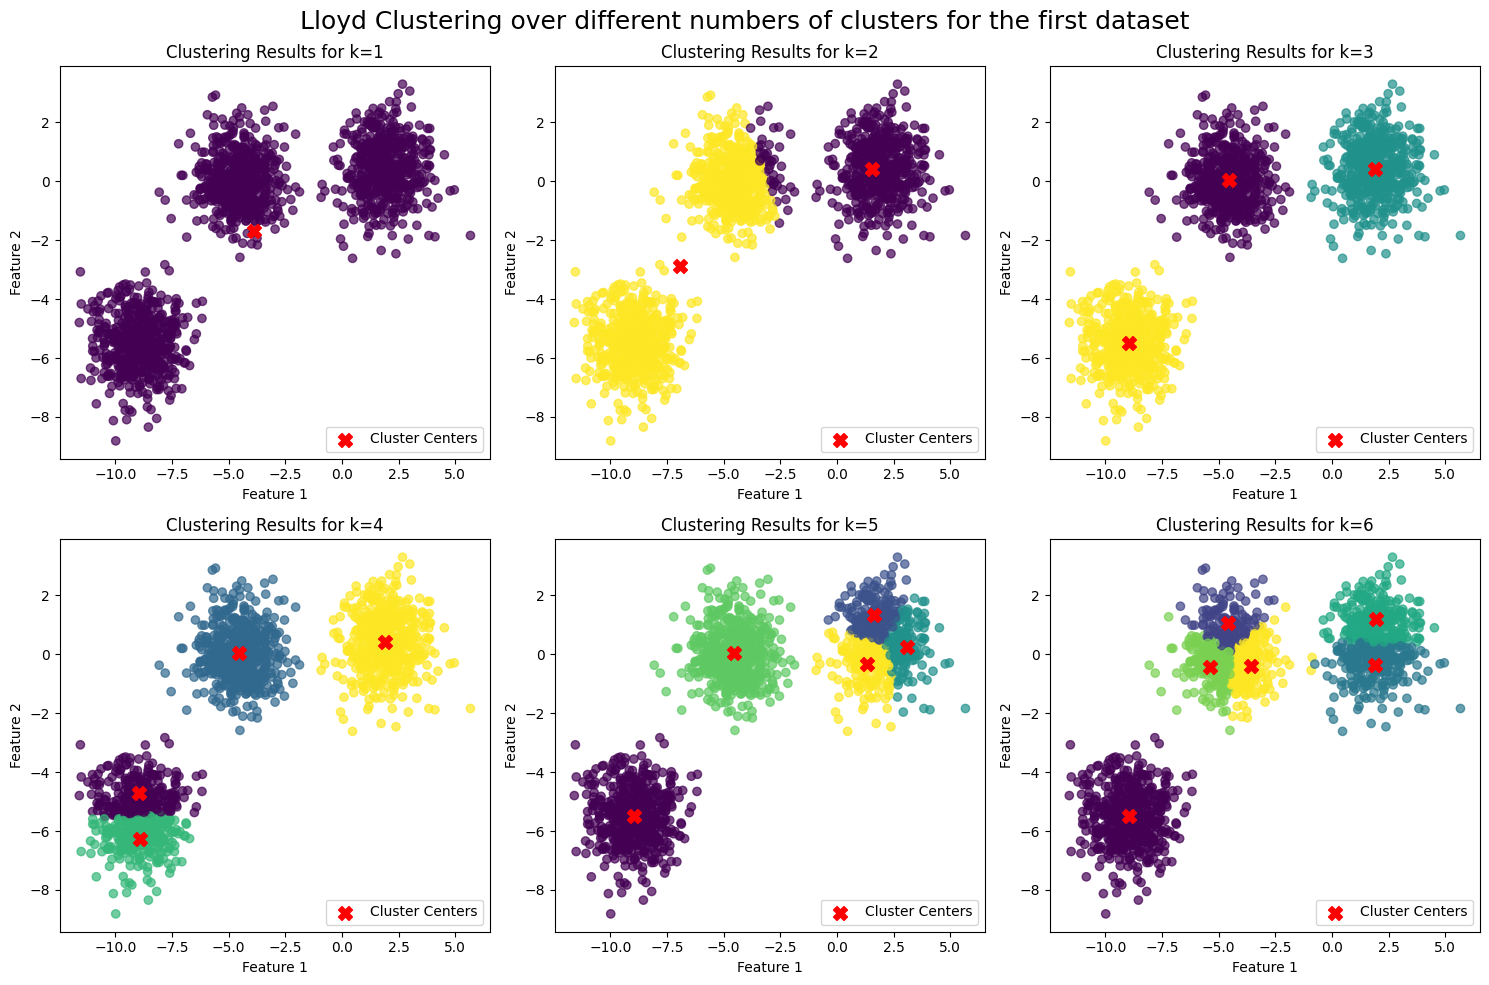

In [16]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Iterating over different number of clusters
for k, ax in zip(range(1, 7), axes):
    centers, assignments = lloyds_algorithm(X, k)
    plot_clusters(ax, X, assignments, centers, k)

fig.suptitle('Lloyd Clustering over different numbers of clusters for the first dataset', fontsize=18)
plt.tight_layout()
plt.show()

Here I will visualize the clustering of the second dataset for cluster numbers of 1,2,3,4,5 and 6.

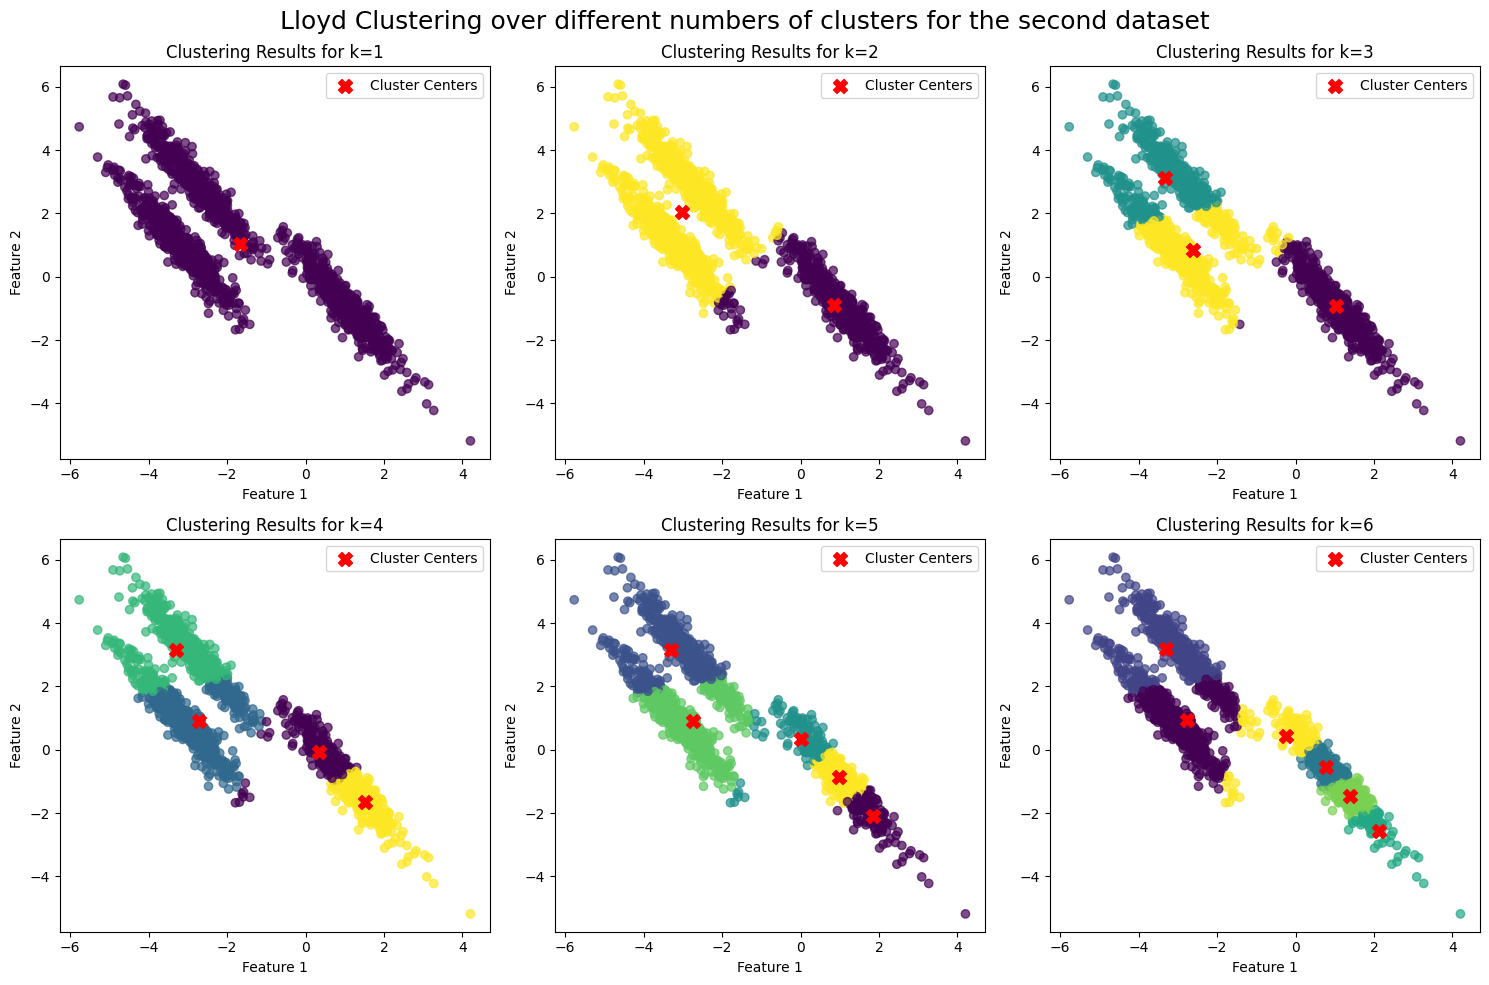

In [17]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Iterating over different number of clusters
for k, ax in zip(range(1, 7), axes):
    centers, assignments = lloyds_algorithm(X_aniso, k)
    plot_clusters(ax, X_aniso, assignments, centers, k)

fig.suptitle('Lloyd Clustering over different numbers of clusters for the second dataset', fontsize=18)
plt.tight_layout()
plt.show()

Here I will visualize the clustering of the third dataset for cluster numbers of 1,2,3,4,5 and 6.

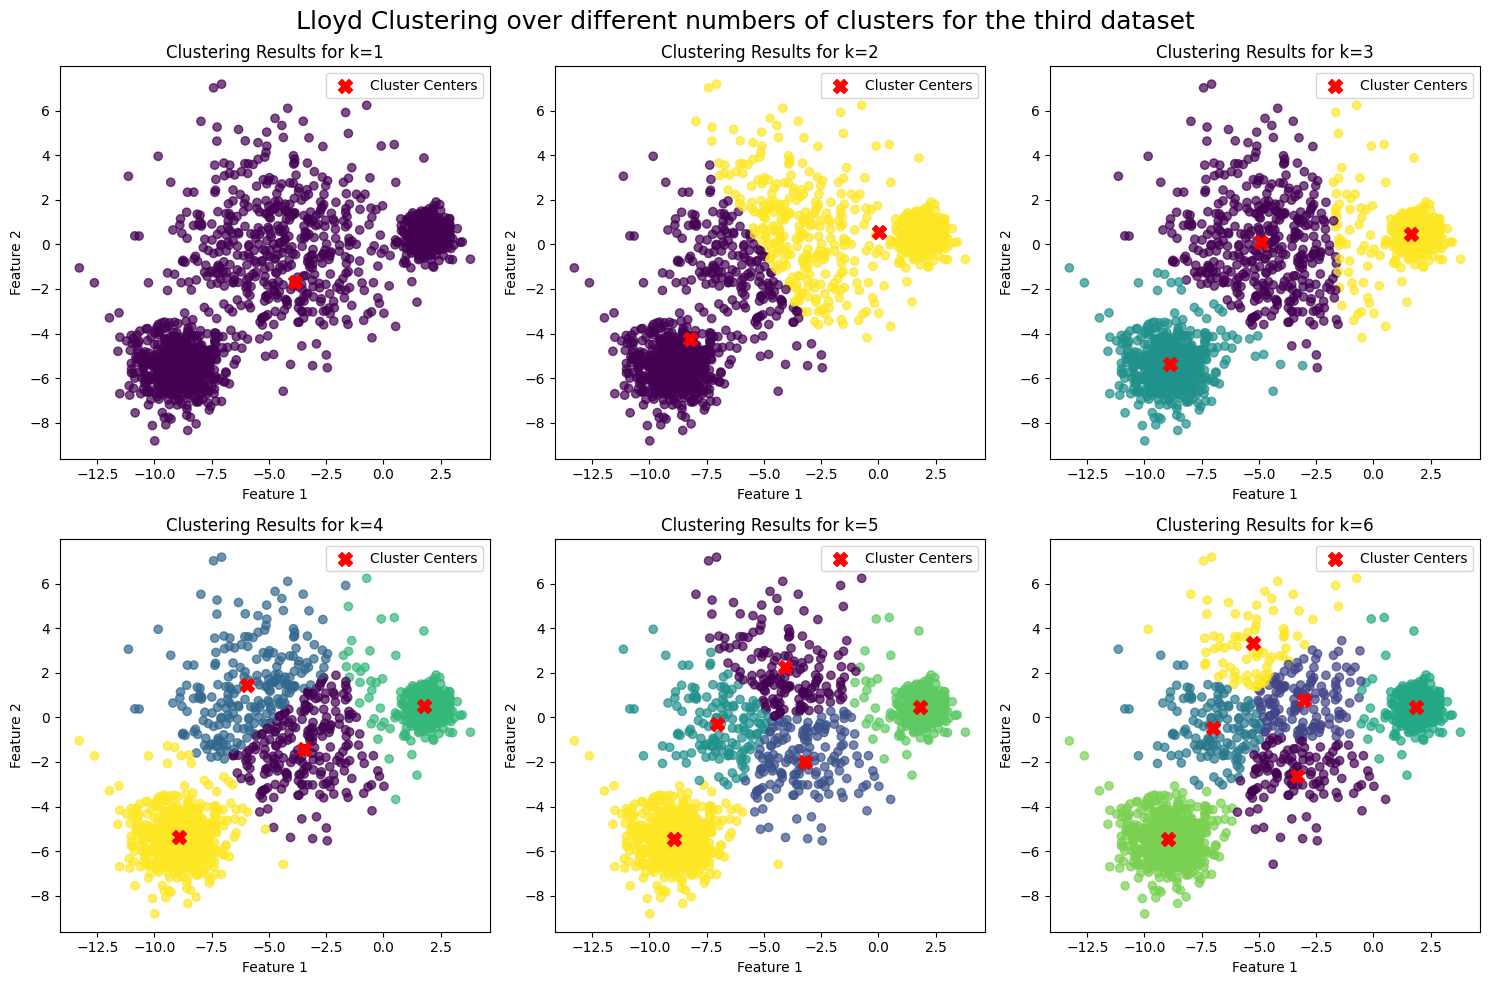

In [18]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Iterating over different number of clusters
for k, ax in zip(range(1, 7), axes):
    centers, assignments = lloyds_algorithm(X_varied, k)
    plot_clusters(ax, X_varied, assignments, centers, k)

fig.suptitle('Lloyd Clustering over different numbers of clusters for the third dataset', fontsize=18)
plt.tight_layout()
plt.show()

Here I will visualize the clustering of the fourth dataset for cluster numbers of 1,2,3,4,5 and 6.

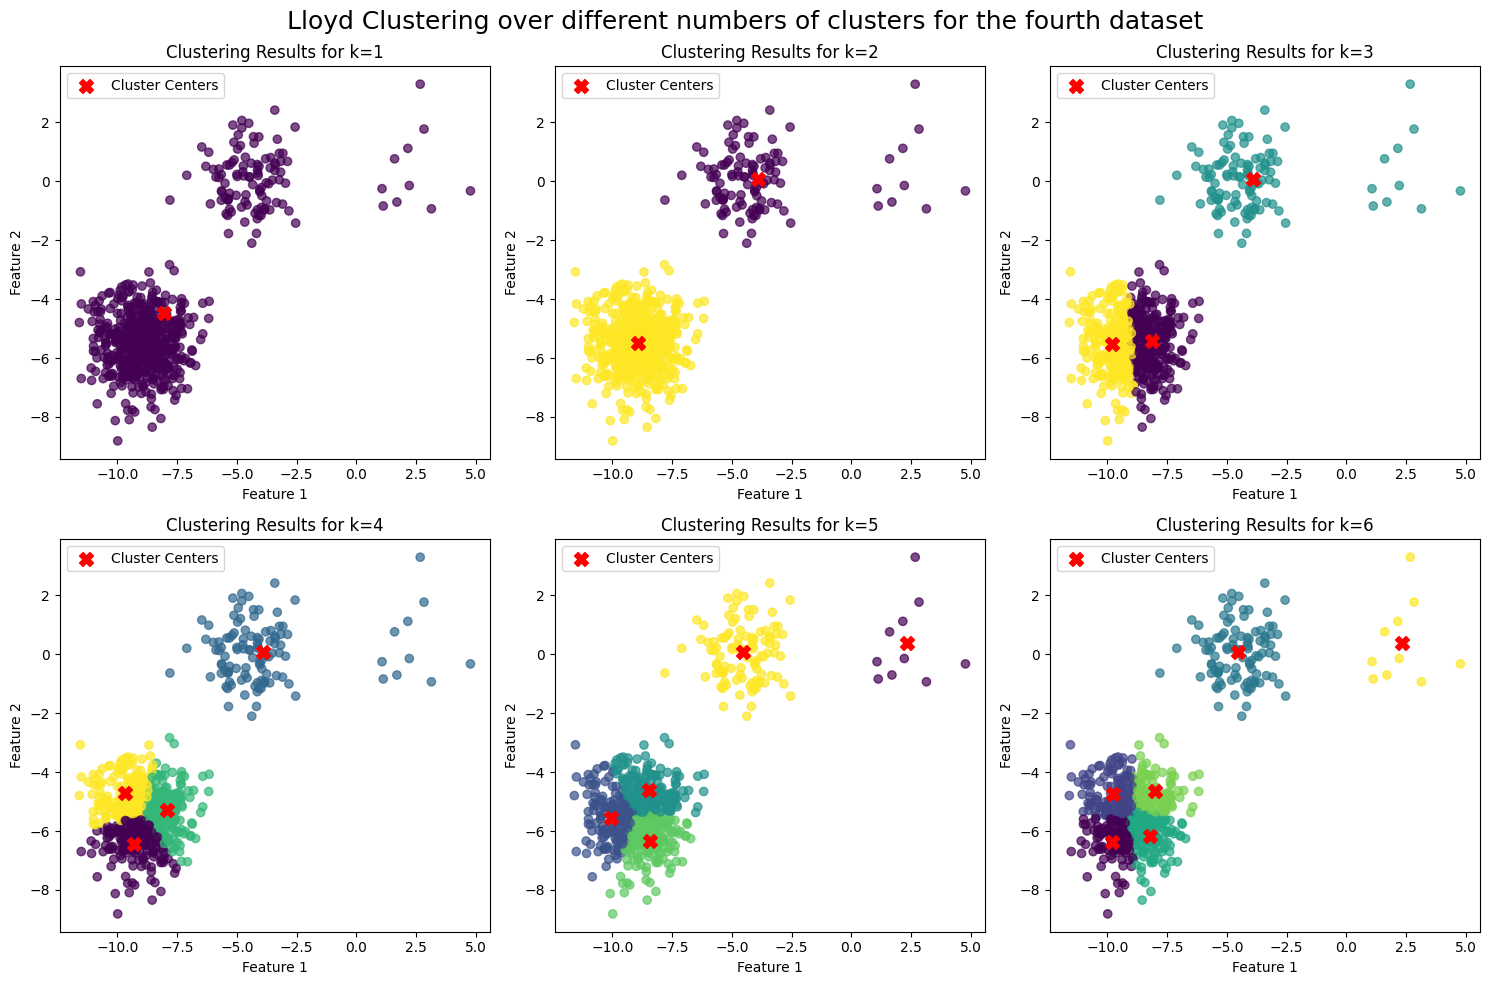

In [19]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Iterating over different number of clusters
for k, ax in zip(range(1, 7), axes):
    centers, assignments = lloyds_algorithm(X_filtered, k)
    plot_clusters(ax, X_filtered, assignments, centers, k)

fig.suptitle('Lloyd Clustering over different numbers of clusters for the fourth dataset', fontsize=18)
plt.tight_layout()
plt.show()

Now, I will plot the k-means objectives for all the datasets.

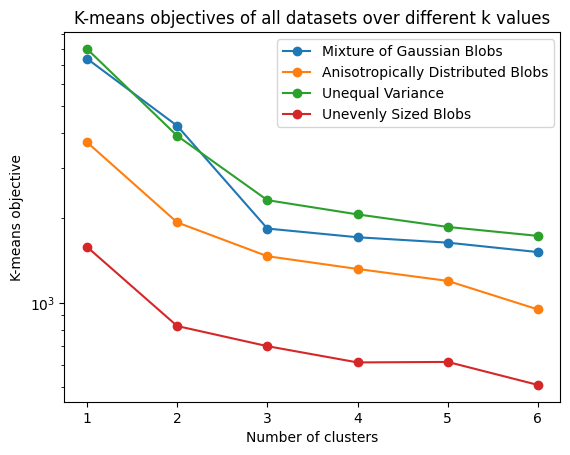

In [20]:
def k_means_objective(data, centers, assignments):
    """
    Function for calculating the k-means objective of the data.
    """
    distances = np.linalg.norm(data[:, np.newaxis] - centers, axis=2)
    return np.sum(np.min(distances, axis=1))

def objective(data):   
    """
    Function that goes through all the k values and calculates the k-means objectives for a given dataset.
    """
    # Array for storing objectives
    objectives = []
    
    for k in k_values:
        # Clustering
        centers, assignments = lloyds_algorithm(data, k)
        
        # K-means objective calculating
        o = k_means_objective(data, centers, assignments)
        objectives.append(o)
        
    return objectives

# Different k values for clustering
k_values = [1, 2, 3, 4, 5, 6]

# Initializing the dictionary for storing the objectives
objectives = {}

# The datasets I am iterating over
datasets = [(X, "Mixture of Gaussian Blobs"), (X_aniso, "Anisotropically Distributed Blobs"), (X_varied, "Unequal Variance"), (X_filtered, "Unevenly Sized Blobs")]


for data, title in datasets:
    obj = objective(data)
    plt.plot(k_values, obj, marker='o', label=title)

plt.title('K-means objectives of all datasets over different k values')
plt.xlabel('Number of clusters')
plt.ylabel('K-means objective')
plt.yscale('log')
plt.legend()
plt.show()


We always need to find an 'elbow point', a point where the rate of decrease in the k-means objective slows down. This point indicates a reasonable number of clusters. It suggests a trade-off between model complexity (number of clusters) and fitting the data well. For some datasets as 'Mixture of gaussian blobs', it is clear that 3 clusters is a good choice for k, while for some others we cannot say for certain, since we may need to test it on even more clusters.

## Subtask 3
Implement k-means++ for initializing the cluster centers as part of your implementation of Lloyd’s algorithm.
* Report the same plots as in the previous task. Are there any differences?


In [21]:
def kmeans_pp_initialize(data, k):
    """
    This is a function which is the main point of difference between kmeans and kmeans++. Kmeans convergence is hugely dependant on  the
    first centroids, which could randomly be picked really badly, which can lead to really slow convergence. Thats is why this function 
    is used for the first centroid picking, where we first choose the first center uniformly at  random. After that, we give each other
    point a probability of  being picked according to the distance from the first centroid. The furthest points have the highest probability, 
    while the closest have the smallest probability. The reason behind it is to have an evenly divided clusters which can perform the clustering
    the best with fast convergence.
    The arguments this function takes are the data and the number of  clusters.
    """
    # Choosing the first centroid uniformly at random
    centers = [data[np.random.choice(data.shape[0])]]

    for _ in range(1, k):
        # Computing the distances from all the points to picked initial centroids
        distances = np.array([min(np.linalg.norm(point - center) for center in centers) for point in data])

        # Choosing the next center from data with probability equal to squared distance
        probabilities = distances ** 2
        probabilities /= probabilities.sum()
        new_center_index = np.random.choice(data.shape[0], p=probabilities)
        centers.append(data[new_center_index])

    return np.array(centers)

def lloyds_algorithm_kmeans_pp(data, k, max_iterations=100):
    """
    It is the same as the lloyds  function I already implemented, only the initialization of first centroids is different,
    which I do in a separate function 'kmeans_pp_initialize'
    """
    cluster_centers = kmeans_pp_initialize(data, k)

    for iteration in range(max_iterations):
        distances = np.linalg.norm(data[:, np.newaxis] - cluster_centers, axis=2)
        assignments = np.argmin(distances, axis=1)

        new_centers = np.array([data[assignments == i].mean(axis=0) for i in range(k)])

        empty_clusters = np.where(np.isnan(new_centers).any(axis=1))[0]
        if len(empty_clusters) > 0:
            for empty_cluster in empty_clusters:
                new_centers[empty_cluster] = data[np.random.choice(data.shape[0])]

        if np.array_equal(cluster_centers, new_centers):
            break

        cluster_centers = new_centers

    return cluster_centers, assignments

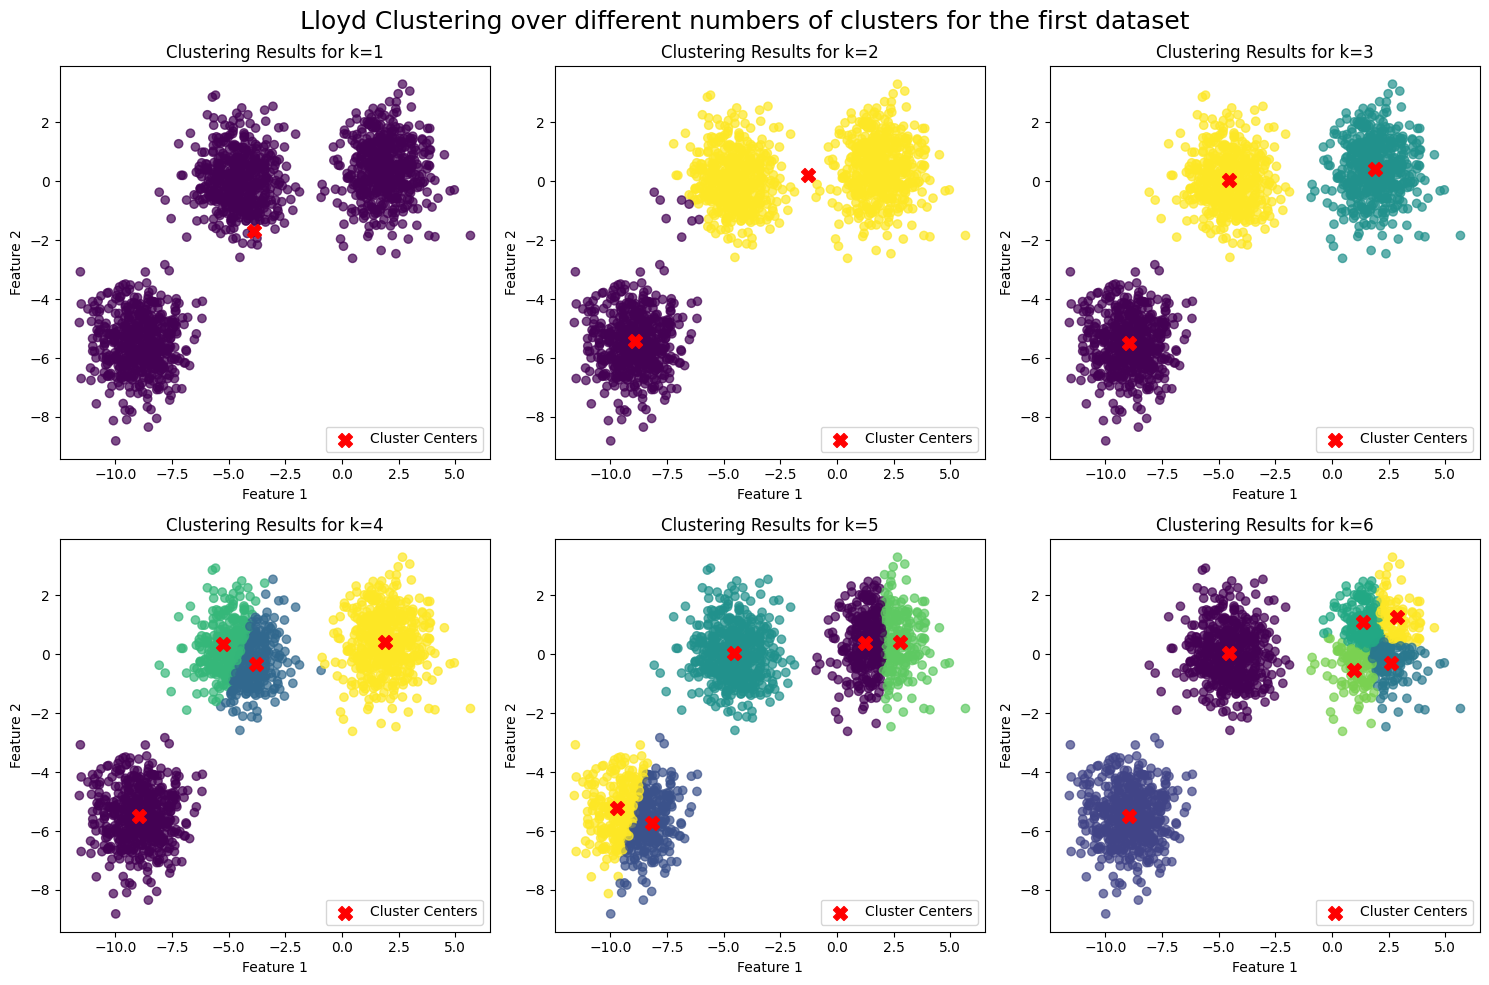

In [22]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Iterating over different number of clusters
for k, ax in zip(range(1, 7), axes):
    centers, assignments = lloyds_algorithm_kmeans_pp(X, k)
    plot_clusters(ax, X, assignments, centers, k)

fig.suptitle('Lloyd Clustering over different numbers of clusters for the first dataset', fontsize=18)
plt.tight_layout()
plt.show()

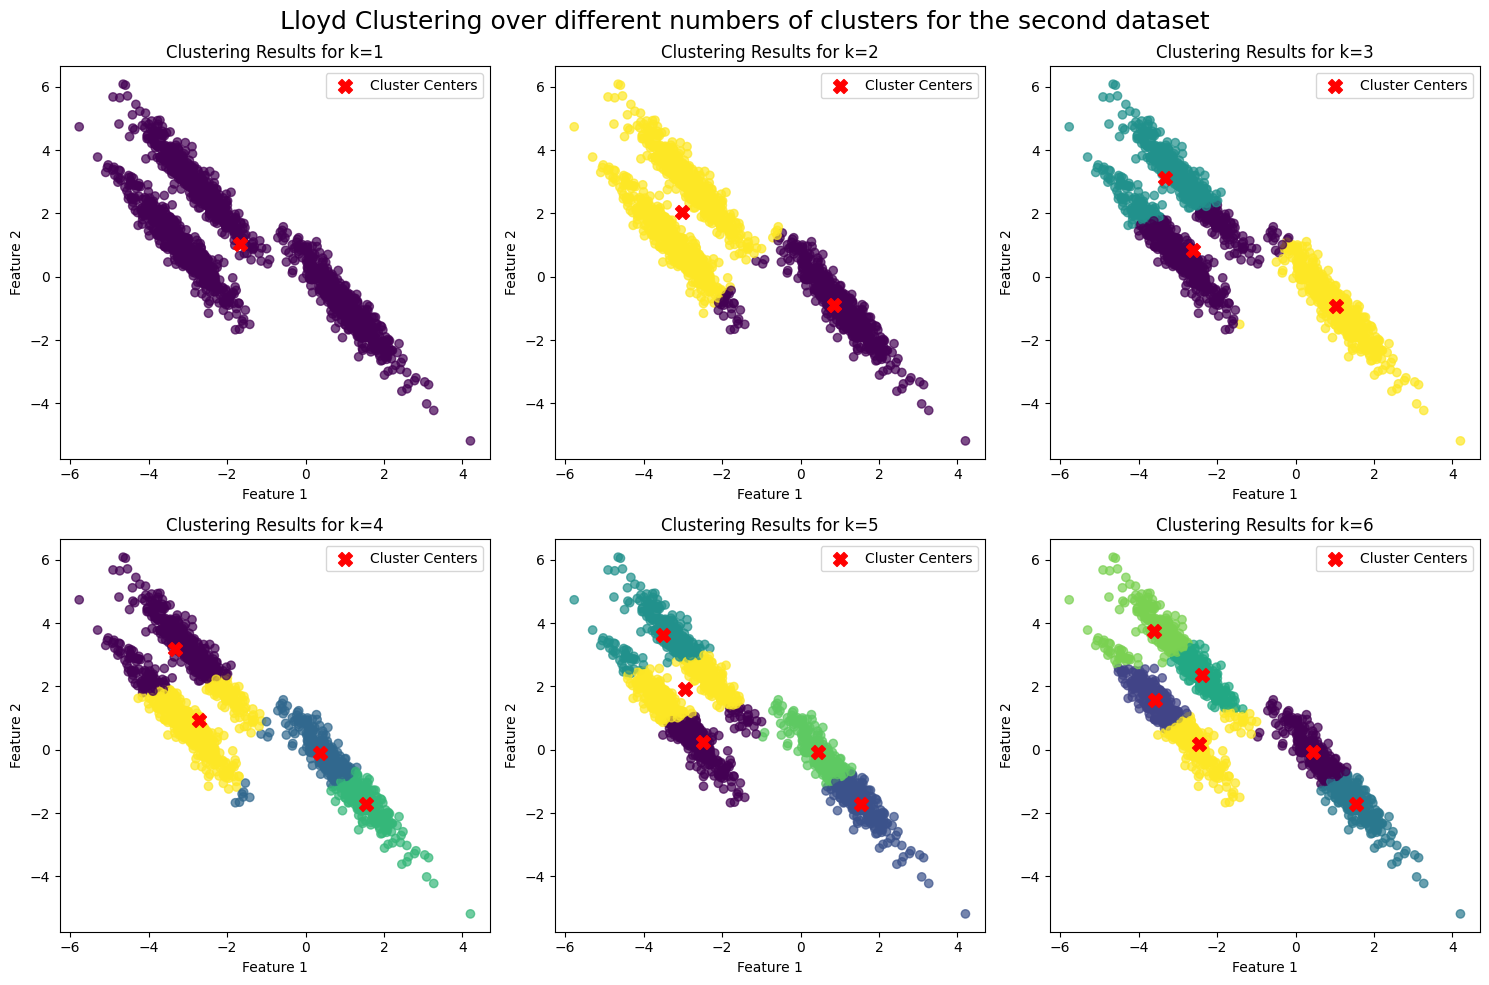

In [23]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Iterating over different number of clusters
for k, ax in zip(range(1, 7), axes):
    centers, assignments = lloyds_algorithm_kmeans_pp(X_aniso, k)
    plot_clusters(ax, X_aniso, assignments, centers, k)

fig.suptitle('Lloyd Clustering over different numbers of clusters for the second dataset', fontsize=18)
plt.tight_layout()
plt.show()

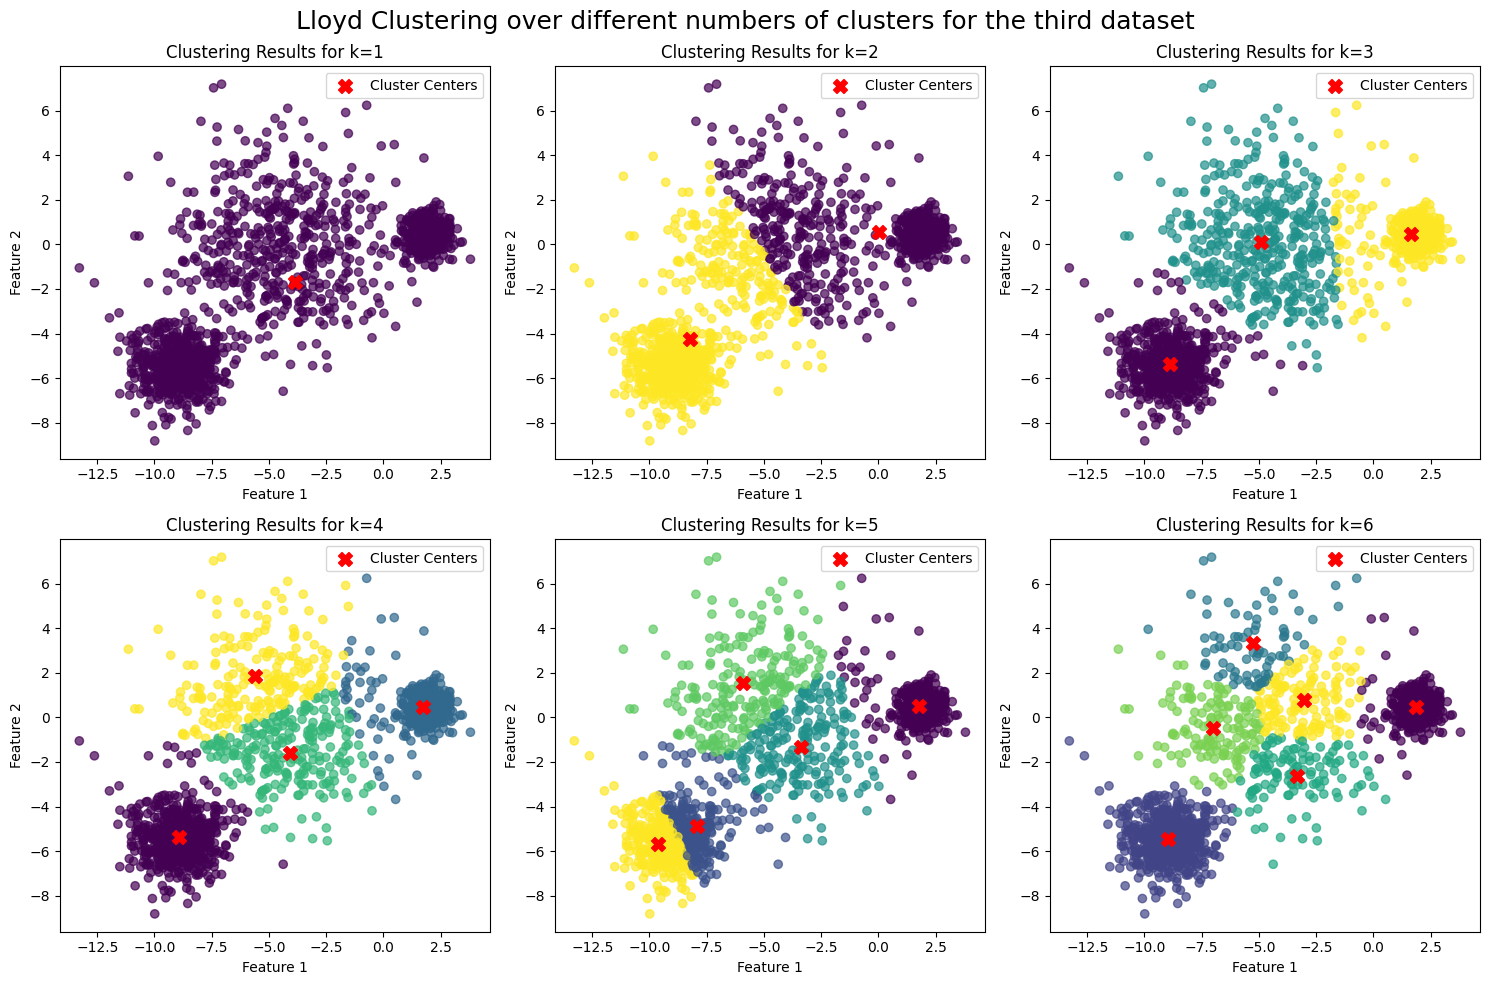

In [24]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Iterating over different number of clusters
for k, ax in zip(range(1, 7), axes):
    centers, assignments = lloyds_algorithm_kmeans_pp(X_varied, k)
    plot_clusters(ax, X_varied, assignments, centers, k)

fig.suptitle('Lloyd Clustering over different numbers of clusters for the third dataset', fontsize=18)
plt.tight_layout()
plt.show()

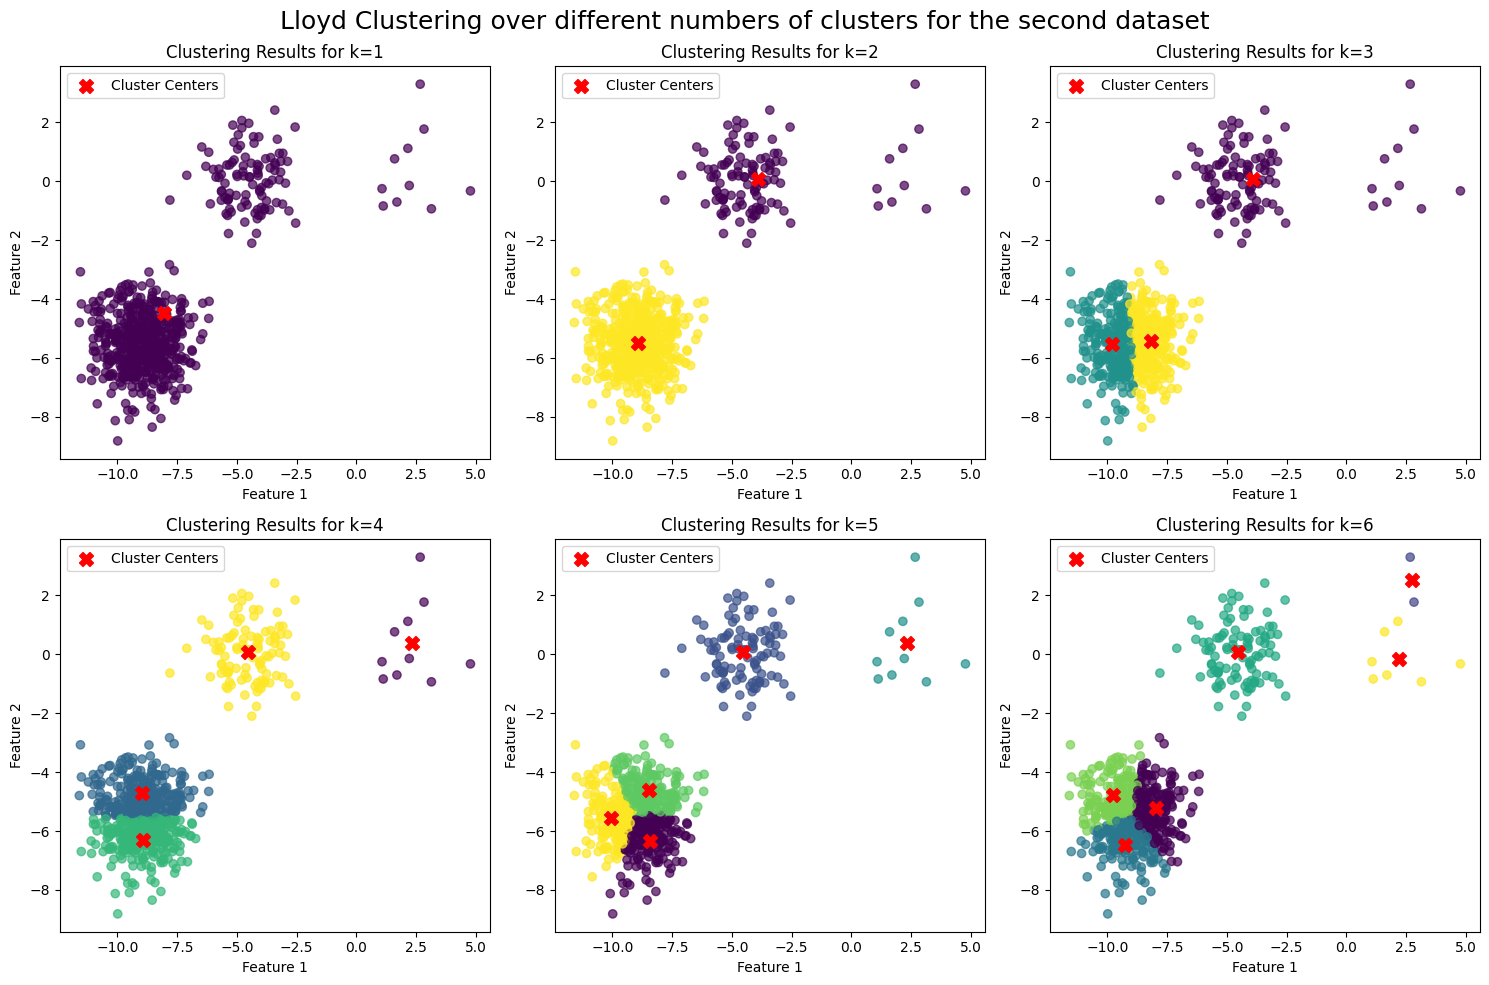

In [25]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Iterating over different number of clusters
for k, ax in zip(range(1, 7), axes):
    centers, assignments = lloyds_algorithm_kmeans_pp(X_filtered, k)
    plot_clusters(ax, X_filtered, assignments, centers, k)

fig.suptitle('Lloyd Clustering over different numbers of clusters for the second dataset', fontsize=18)
plt.tight_layout()
plt.show()

The main difference I notice comparing these plots to the ones  before is cluster quality which is noticably higher while using kmeans++. It can also be noticed that it is more robust to outliers, since we dont pick the initial centroids randomly, it gives consistent results and it should converge faster (didn't calculate it just assuming it).